In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df_train = pd.read_csv("Tunisair/Train.csv",low_memory=False,parse_dates=["DATOP"])
df_test = pd.read_csv("Tunisair/Test.csv")

In [26]:
df_train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [27]:
df_test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [28]:
# Sort DataFrame in date order
df_train.sort_values(by=["DATOP"],inplace=True,ascending=True)

In [6]:
df_train["YROP"] = df_train.DATOP.dt.year
df_train["MTOP"] = df_train.DATOP.dt.month
df_train["DAOP"] = df_train.DATOP.dt.day





In [7]:
df_train["DWOP"] = df_train.DATOP.dt.dayofweek
df_train["DYOP"] = df_train.DATOP.dt.dayofyear

In [8]:
df_train["STD"] = pd.to_datetime(df_train["STD"])
df_train["STA"] = pd.to_datetime(df_train["STA"])
df_train["STT"]  = df_train["STD"]-df_train["STA"]
df_train['STD'] = df_train.STD.dt.strftime('%H:%M')
df_train['STA'] = df_train.STA.dt.strftime('%H:%M')


ParserError: Unknown string format: 2016-01-01 09.25.00

In [29]:
df_train

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
4510,train_id_4510,2016-01-01,TU 0282,TUN,TLS,2016-01-01 07:30:00,2016-01-01 09.25.00,ATA,TU 736IOL,14.0
33327,train_id_33327,2016-01-01,UG 0009,DJE,TUN,2016-01-01 15:30:00,2016-01-01 16.30.00,SCH,UG AT7LBD,0.0
7179,train_id_7179,2016-01-01,TU 0880,TUN,AMS,2016-01-01 06:30:00,2016-01-01 09.20.00,ATA,TU 736IOP,36.0
7180,train_id_7180,2016-01-01,TU 0251,NCE,MIR,2016-01-01 09:30:00,2016-01-01 11.15.00,ATA,TU 736IOR,0.0
7181,train_id_7181,2016-01-01,TU 0847,TUN,BEY,2016-01-01 09:30:00,2016-01-01 12.45.00,ATA,TU 320IMR,39.0
...,...,...,...,...,...,...,...,...,...,...
103511,train_id_103511,2018-12-31,TU 0588,TOE,LYS,2018-12-31 15:30:00,2018-12-31 17.50.00,ATA,TU 736IOK,0.0
103513,train_id_103513,2018-12-31,TU 0527,DUS,TUN,2018-12-31 16:25:00,2018-12-31 19.05.00,ATA,TU 32AIMG,47.0
103514,train_id_103514,2018-12-31,TU 0543,MUC,TUN,2018-12-31 16:05:00,2018-12-31 18.10.00,ATA,TU 32AIMD,7.0
103507,train_id_103507,2018-12-31,TU 0996,TUN,NCE,2018-12-31 07:50:00,2018-12-31 09.20.00,ATA,TU 32AIMP,17.0


In [30]:
df_train

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
4510,train_id_4510,2016-01-01,TU 0282,TUN,TLS,2016-01-01 07:30:00,2016-01-01 09.25.00,ATA,TU 736IOL,14.0
33327,train_id_33327,2016-01-01,UG 0009,DJE,TUN,2016-01-01 15:30:00,2016-01-01 16.30.00,SCH,UG AT7LBD,0.0
7179,train_id_7179,2016-01-01,TU 0880,TUN,AMS,2016-01-01 06:30:00,2016-01-01 09.20.00,ATA,TU 736IOP,36.0
7180,train_id_7180,2016-01-01,TU 0251,NCE,MIR,2016-01-01 09:30:00,2016-01-01 11.15.00,ATA,TU 736IOR,0.0
7181,train_id_7181,2016-01-01,TU 0847,TUN,BEY,2016-01-01 09:30:00,2016-01-01 12.45.00,ATA,TU 320IMR,39.0
...,...,...,...,...,...,...,...,...,...,...
103511,train_id_103511,2018-12-31,TU 0588,TOE,LYS,2018-12-31 15:30:00,2018-12-31 17.50.00,ATA,TU 736IOK,0.0
103513,train_id_103513,2018-12-31,TU 0527,DUS,TUN,2018-12-31 16:25:00,2018-12-31 19.05.00,ATA,TU 32AIMG,47.0
103514,train_id_103514,2018-12-31,TU 0543,MUC,TUN,2018-12-31 16:05:00,2018-12-31 18.10.00,ATA,TU 32AIMD,7.0
103507,train_id_103507,2018-12-31,TU 0996,TUN,NCE,2018-12-31 07:50:00,2018-12-31 09.20.00,ATA,TU 32AIMP,17.0


<AxesSubplot:>

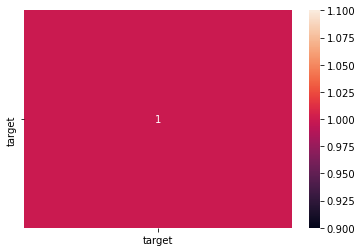

In [31]:
sns.heatmap(df_train.corr(),annot=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
s = (df_train.dtypes == 'object')
object_cols = list(s[s].index)
label_encoder = LabelEncoder()
label_df_train = df_train.copy()
for col in object_cols:
    label_df_train[col] = label_encoder.fit_transform(df_train[col])

In [33]:
label_df_train

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
4510,46836,2016-01-01,118,123,113,9,8,0,51,14.0
33327,33755,2016-01-01,1751,37,119,47,44,4,61,0.0
7179,76490,2016-01-01,283,123,6,4,7,0,54,36.0
7180,76502,2016-01-01,97,89,79,17,15,0,56,0.0
7181,76513,2016-01-01,273,123,13,17,23,0,31,39.0
...,...,...,...,...,...,...,...,...,...,...
103511,3906,2018-12-31,191,120,76,81673,85103,0,50,0.0
103513,3908,2018-12-31,178,41,119,81678,85108,0,41,47.0
103514,3909,2018-12-31,184,84,119,81675,85105,0,39,7.0
103507,3901,2018-12-31,299,123,87,81631,85056,0,47,17.0


In [34]:
label_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107833 entries, 4510 to 99403
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ID      107833 non-null  int32         
 1   DATOP   107833 non-null  datetime64[ns]
 2   FLTID   107833 non-null  int32         
 3   DEPSTN  107833 non-null  int32         
 4   ARRSTN  107833 non-null  int32         
 5   STD     107833 non-null  int32         
 6   STA     107833 non-null  int32         
 7   STATUS  107833 non-null  int32         
 8   AC      107833 non-null  int32         
 9   target  107833 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(8)
memory usage: 5.8 MB


In [35]:
label_df_train.drop("DATOP",axis=1,inplace=True)

In [36]:
X = label_df_train.drop("target",axis=1)
y = label_df_train["target"]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
# Evaluation function
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {
        "Training MAE": mean_absolute_error(y_train,train_preds),
        "Valid MAE":mean_absolute_error(y_test,val_preds),
        "Training RMSLE": rmsle(y_train,train_preds),
        "Valid RMSLE": rmsle(y_test,val_preds),
        "Training R^2": r2_score(y_train,train_preds),
        "Valid R^2": r2_score(y_test,val_preds)
    }
    return scores

In [39]:
show_scores(model)

{'Training MAE': 16.6451509285234,
 'Valid MAE': 44.876422311865355,
 'Training RMSLE': 1.2585402963396266,
 'Valid RMSLE': 1.8224707288074724,
 'Training R^2': 0.8956416996752665,
 'Valid R^2': 0.25150528877360767}

In [41]:
model_1 = ExtraTreesRegressor()
model_1.fit(X_train,y_train)
show_scores(model_1)

{'Training MAE': 0.0,
 'Valid MAE': 46.01618491213428,
 'Training RMSLE': 0.0,
 'Valid RMSLE': 1.8521127959071881,
 'Training R^2': 1.0,
 'Valid R^2': 0.22485345120078892}

In [43]:
model_2 = GradientBoostingRegressor()
model_2.fit(X_train,y_train)
show_scores(model_2)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [38]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
show_scores(model_lr)

C:\Users\mount\Desktop\tf-keras\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Training MAE': 48.48897595808314,
 'Valid MAE': 49.719803403347704,
 'Training RMSLE': 3.035838259535787,
 'Valid RMSLE': 3.036880245254448,
 'Training R^2': -0.17614742406573147,
 'Valid R^2': -0.16246546554185093}

In [104]:
%%time
from sklearn.model_selection import RandomizedSearchCV
# Different RandomForestRegressor hyperparameters
rf_grid = {
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features": [0.5,1,"sqrt","auto"],
    "max_samples":[10000]
}
# Instanciate RandomizedSearchCV
rs_model = RandomizedSearchCV(
RandomForestRegressor(n_jobs=-1,
                     random_state=42),
                    param_distributions = rf_grid,
                     n_iter=50,
                    cv=5,
                    verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.0min finished


Wall time: 2min


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [105]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [106]:
# Evaluate the Randomized Search model
show_scores(rs_model)

{'Training MAE': 45.6459904157646,
 'Valid MAE': 49.60717559234015,
 'Training RMSLE': 1.9097364417585985,
 'Valid RMSLE': 1.9596188588673753,
 'Training R^2': 0.22331164439333973,
 'Valid R^2': 0.15234766587834025}

In [87]:
from sklearn.model_selection import GridSearchCV
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}
model = RandomForestRegressor(n_jobs=-1)

gs_clf = GridSearchCV(estimator=model,
                       param_grid=grid_2, 
                       cv=5,
                       verbose=2)

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=  10.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   9.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   9.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   9.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   9.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=  17.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=  16.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=  16.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=  15.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=  15.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=  16.0s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 16.1min finished


In [88]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [89]:
show_scores(gs_clf)

{'Training MAE': 22.763923124933182,
 'Valid MAE': 43.490413677054036,
 'Training RMSLE': 1.4196264677398647,
 'Valid RMSLE': 1.794789661829495,
 'Training R^2': 0.7938798472930164,
 'Valid R^2': 0.2490463538338853}

In [55]:
from sklearn.preprocessing import LabelEncoder
s = (df_test.dtypes == 'object')
object_cols = list(s[s].index)
label_encoder = LabelEncoder()
label_df_test = df_test.copy()
for col in object_cols:
    label_df_test[col] = label_encoder.fit_transform(df_test[col])

In [75]:
label_df_test.drop("DATOP",axis=1,inplace=True)

In [107]:
predictions = rs_model.predict(label_df_test)

In [108]:
predictions

array([115.39433333,  97.527     , 117.002     , ...,   0.        ,
         0.        ,   0.        ])

In [109]:
# Loading test predictions into csv
submission_fly = pd.DataFrame({'ID':df_test["ID"],'target': predictions.astype(np.int32)});
submission_fly.to_csv('submission_fly_five.csv', index=False)
submission_fly

,ID,target
0,test_id_0,115
1,test_id_1,97
2,test_id_2,117
3,test_id_3,111
4,test_id_4,116
...,...,...
9328,test_id_9328,78
9329,test_id_9329,0
9330,test_id_9330,0
9331,test_id_9331,0
